# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
import numpy as np
import pandas as pd

import pylab as plt 
plt.rcParams['figure.figsize']=(8, 6)  # tamaño por defecto, decenas de pixeles

import seaborn as sns  # esta basada en matplotlib

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [2]:
fitbit = pd.read_csv('../data/Fitbit2.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

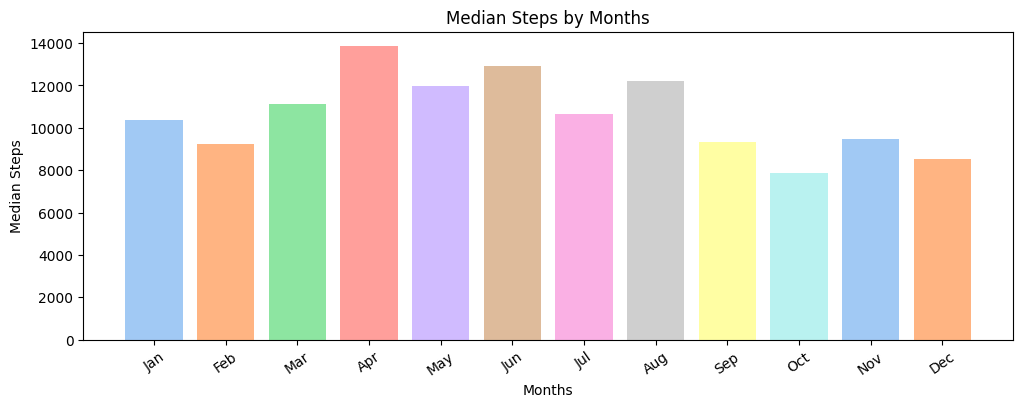

In [34]:
m_steps = fitbit.groupby('Months_encoded')['Steps'].median() 

fig, ax = plt.subplots(figsize=(12, 4))
cus_pal = sns.color_palette("pastel", len(m_steps))
ax.bar(m_steps.index, m_steps.values, color=cus_pal)

ax.set_xticks(m_steps.index)
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

ax.set_xlabel('Months')
ax.set_ylabel('Median Steps')
ax.set_title('Median Steps by Months')


plt.xticks(rotation=35);

plt.savefig('../figures/m_steps.png');

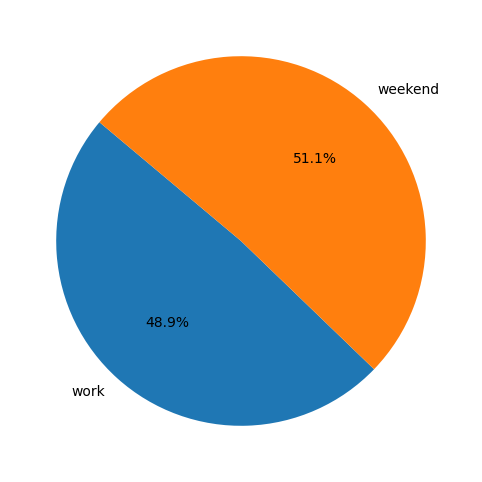

In [35]:
d_steps = fitbit.groupby(['Work_or_Weekend'])['Steps'].median()
plt.pie(d_steps, labels = ['work', 'weekend'], autopct='%1.1f%%', startangle=140)
plt.savefig('../figures/d_steps.png');

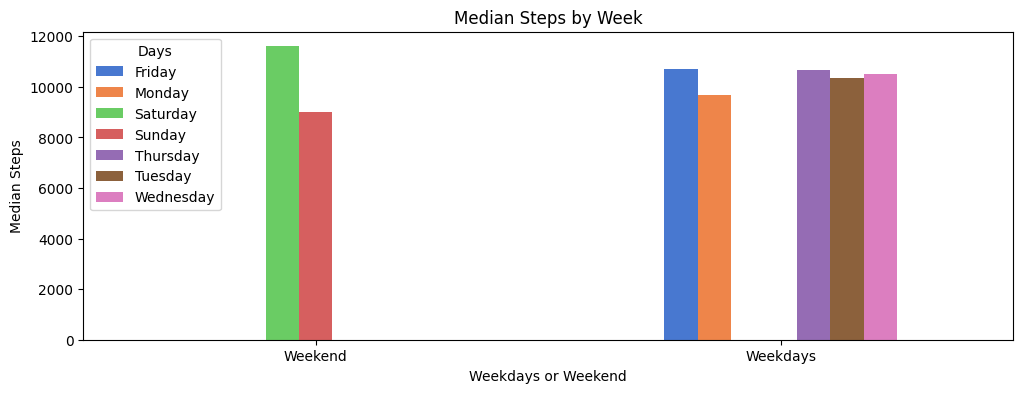

<Figure size 800x600 with 0 Axes>

In [39]:
wd_steps = fitbit.groupby(['Work_or_Weekend', 'Days'])['Steps'].median().unstack()

fig, ax = plt.subplots(figsize=(12, 4))
cus_pal = sns.color_palette("muted", n_colors=len(wd_steps.columns))

d_steps.plot(kind='bar', ax=ax, color=cus_pal)

ax.set_xticks(wd_steps.index)
ax.set_xticklabels([1, 0])

ax.set_xticklabels(['Weekend', 'Weekdays'], rotation=0)
ax.set_xlabel('Weekdays or Weekend')
ax.set_ylabel('Median Steps')
ax.set_title('Median Steps by Week')

plt.show()
plt.savefig('../figures/wd_steps.png');

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

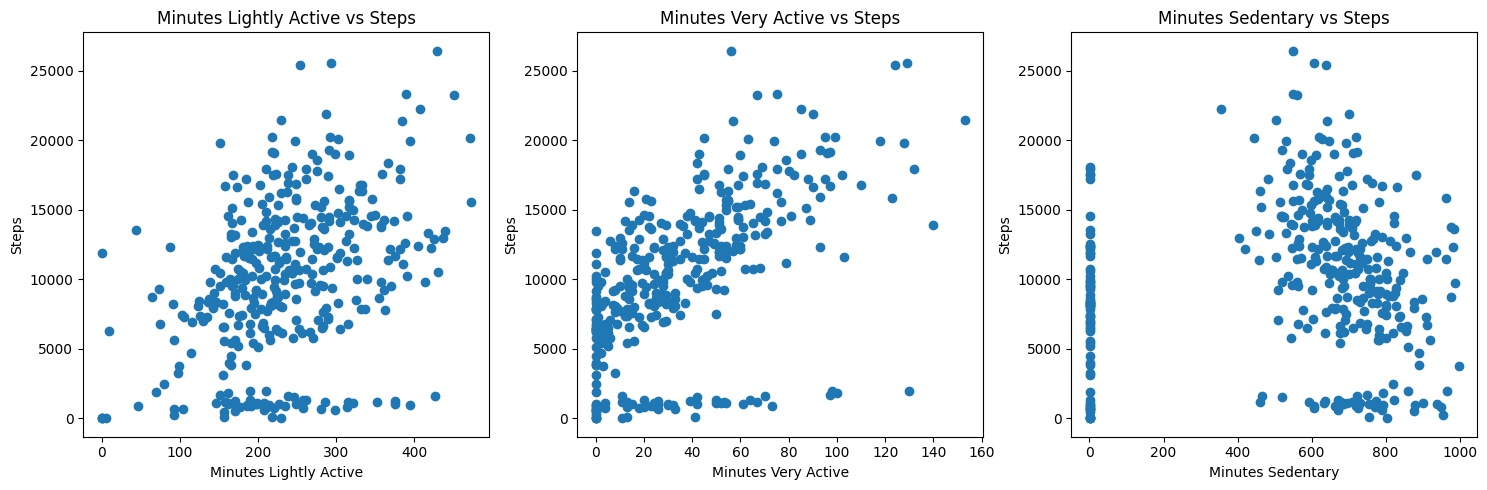

<Figure size 800x600 with 0 Axes>

In [41]:
features = [
    ('Minutes Lightly Active', 'Steps'),
    ('Minutes Very Active', 'Steps'),
    ('Minutes Sedentary', 'Steps')
]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, (x_feature, y_feature) in enumerate(features):
    ax = axes[i]
    ax.scatter(fitbit[x_feature], fitbit[y_feature])
    ax.set_xlabel(x_feature)
    ax.set_ylabel(y_feature)
    ax.set_title(f'{x_feature} vs {y_feature}')

plt.tight_layout()

plt.show()
plt.savefig('../figures/features.png');

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [43]:
titanic=pd.read_csv('../data/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [44]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Gender       1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [45]:
titanic.select_dtypes(include=['number'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [46]:
titanic.select_dtypes(include=['object'])

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [49]:
plt.style.use('classic')
plt.figure(figsize=(12, 6));

<Figure size 960x480 with 0 Axes>

#### Use the right visulalization to show the distribution of column `Age`.

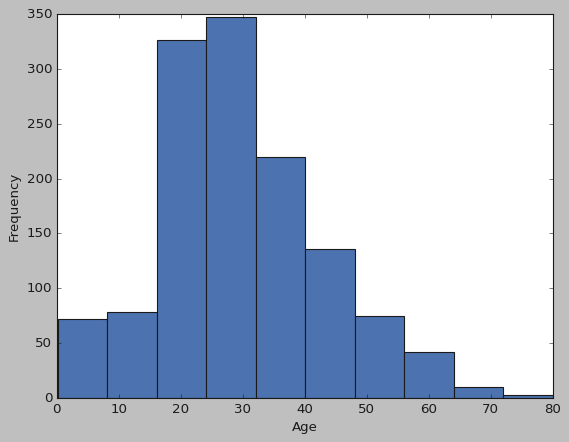

In [57]:
plt.hist(titanic['Age'], bins=10)

plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show();

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

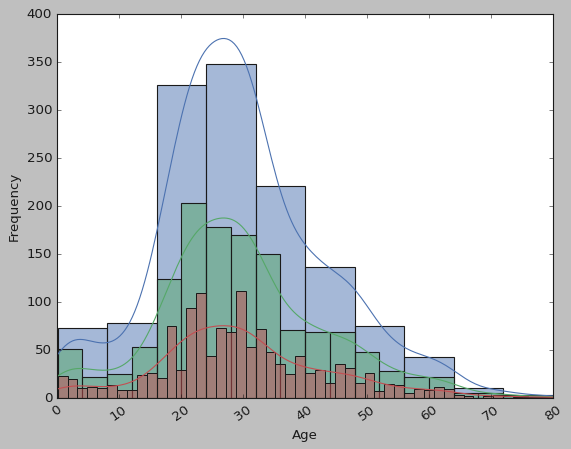

In [62]:
bins = [10, 20 , 50]

for i in bins:
    sns.histplot(data = titanic['Age'], bins = i, kde = True)
    
    plt.xlabel('Age')
    plt.ylabel('Frequency')

    plt.xticks(rotation=35)
    ;

#### How does the bin size affect your plot?

In [13]:
"""
Afecta al tamaño de las columnas y la cantidad de datos observados
"""

'\nyour comments here\n'

#### Use seaborn to show the distribution of column `Age`.

''

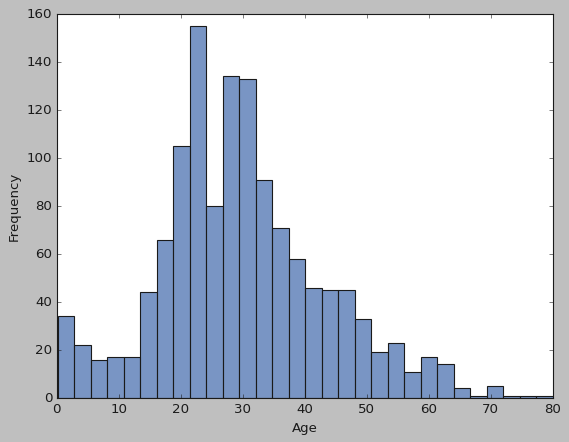

In [65]:
sns.histplot(titanic, x="Age")
plt.ylabel('Frequency')
;

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

''

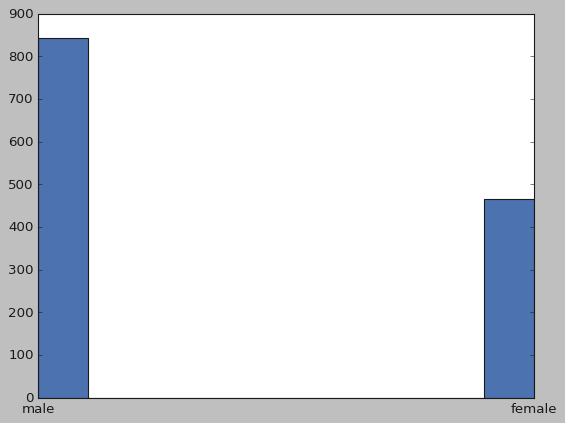

In [70]:
# Method 1 - matplotlib

gender1 = plt.hist(titanic['Gender'])
;

''

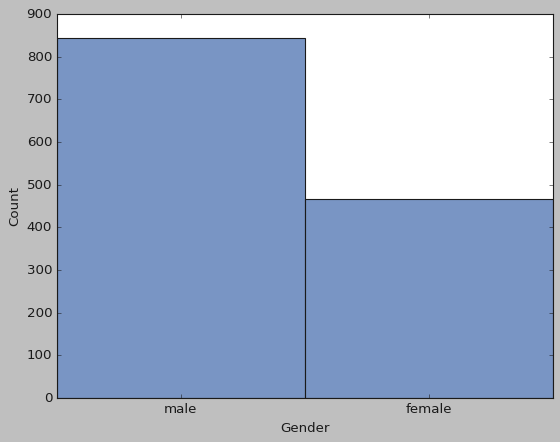

In [75]:
# Method 2 - seaborn

gender2 = sns.histplot(data=titanic, x='Gender')
;

#### Use the right plot to visualize the column `Pclass`.

''

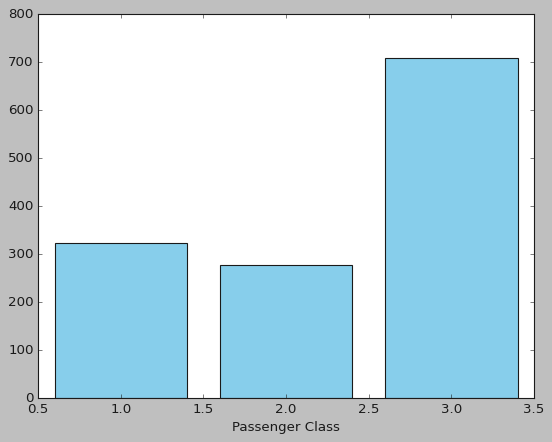

In [80]:
pclass_counts = titanic['Pclass'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
plt.bar(pclass_counts.index, pclass_counts, color='skyblue')
plt.xlabel('Passenger Class')
;

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

''

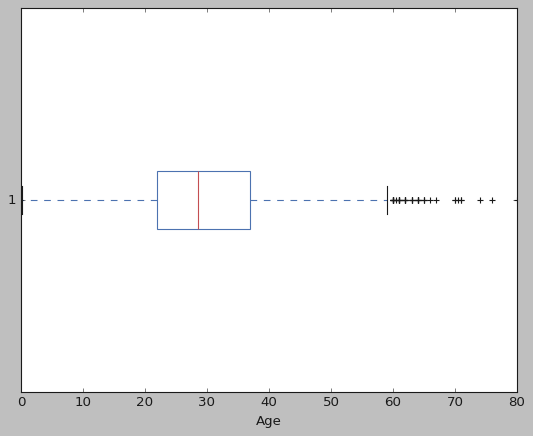

In [84]:
# count, media, min, max, percentiles. USAR BOXPLOT

plt.figure(figsize=(8, 6))
plt.boxplot(titanic['Age'], vert=False, patch_artist=True)
plt.xlabel('Age')
;


#### What does the last plot tell you about the feature `Age`?

In [85]:
"""
La media se encuentra sobre los 30 años aprox.
"""

'\nLa media se encuentra sobre los 30 años aprox.\n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

''

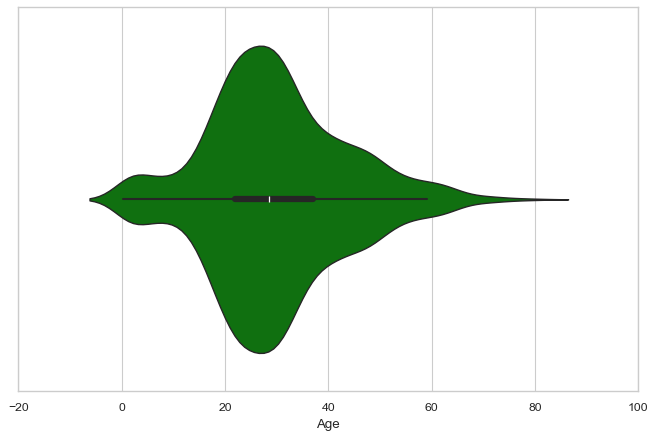

In [92]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=titanic['Age'], color='green')
plt.xlabel('Age')
;

#### What additional information does the last plot provide about feature `Age`?

In [22]:
"""
Nos proporciona una visual rápida sobre las edades, igual que antes la media se situa sobre los 30 años
"""

'\nyour comments here\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

''

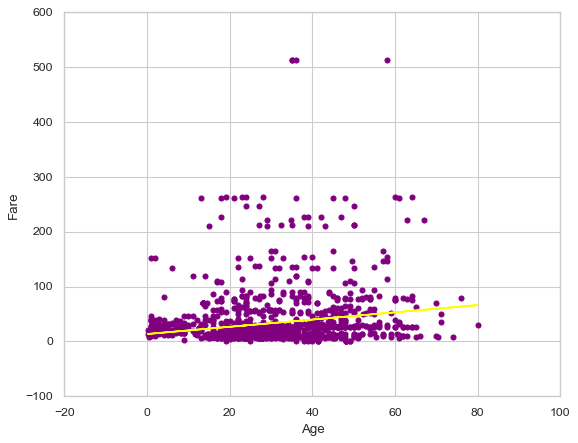

In [103]:
# Method 1 - matplotlib

age = titanic['Age'].values
fare = titanic['Fare'].values

coefficients = np.polyfit(age, fare, 1)
poly = np.poly1d(coefficients)

plt.scatter(age,fare, color='purple', label='Scatter Plot')
plt.plot(age, poly(age), color='yellow', label='Regression Line')
plt.xlabel('Age')
plt.ylabel('Fare')
;

''

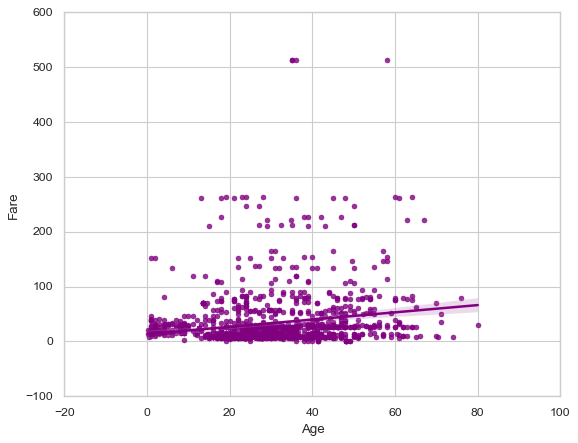

In [104]:
# Method 2 - seaborn

sns.regplot(data=titanic, x='Age', y='Fare', color='purple')
plt.xlabel('Age')
plt.ylabel('Fare')
;

#### Plot the correlation matrix using seaborn.

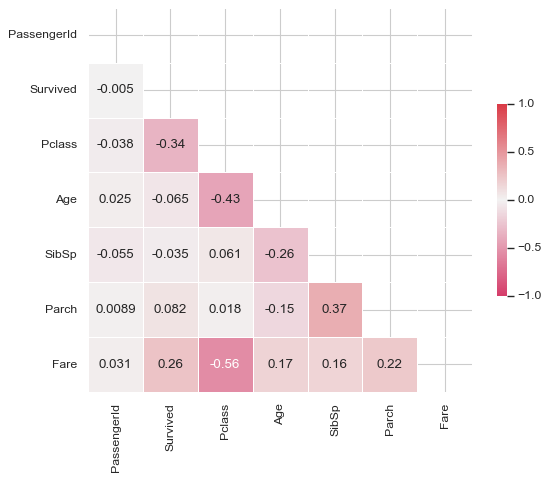

In [112]:
num_col= titanic.select_dtypes(exclude=['object'])
corr=num_col.corr()
mascara = np.triu(np.ones_like(corr, dtype=bool))  
cmap = sns.diverging_palette(0, 10, as_cmap=True)

sns.heatmap(corr,             
            mask=mascara,      
            cmap=cmap,
            
            vmax=1,           
            vmin=-1,          
            center=0,      
            
            square=True,    
            linewidth=0.5,    
            
            cbar_kws={'shrink': 0.5}, 
            annot=True               
            
           );

#### What are the most correlated features?

In [26]:
"""
SibSp y Parch las mas relacionadas
"""

'\nyour comments here\n'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

''

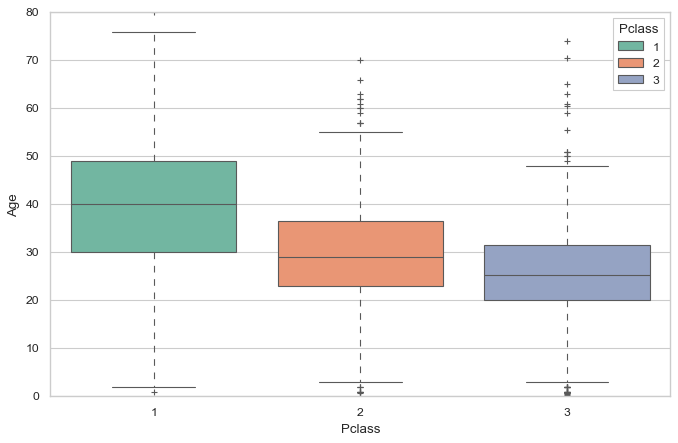

In [118]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='Pclass', y='Age', data=titanic, palette='Set2', hue='Pclass')
;


#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

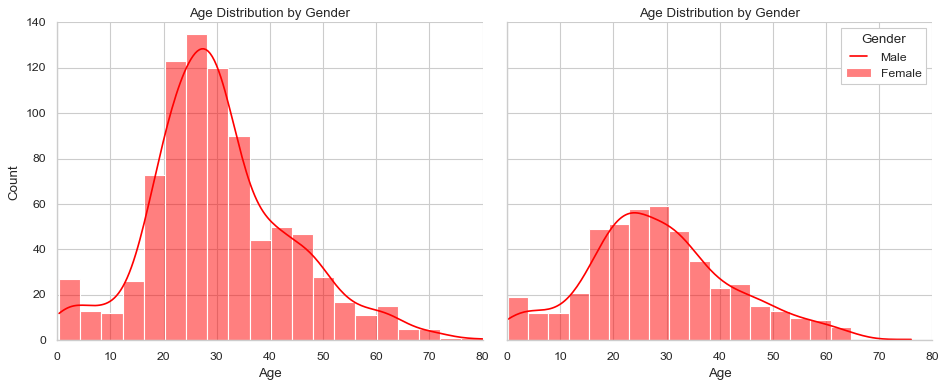

In [124]:
g = sns.FacetGrid(titanic, col="Gender", height=5, aspect=1.2)

g.map(sns.histplot, "Age", bins=20, kde=True, color="red")

g.set_axis_labels("Age", "Count")
g.set_titles("Age Distribution by Gender")

plt.legend(title='Gender', labels=['Male', 'Female'])